## Instrucciones

### En este notebook, encontrarás la definición de un grafo que representa la conexión entre algunas ciudades de México, tu trabajo será mapear la mejor ruta para llegar de la Ciudad A, a la ciudad B, y para ello, deberás de hacer en nuevas celdas en este script, lo siguiente:

#### * Preguntar al usuario cuál es la ciudad desde la que desea partir, y cuál es la ciudad destino
#### * Utilizar los algoritmos de búsqueda en amplitud y búsqueda en profundidad para encontrar TODAS las rutas que me permitan llegar de una ciudad a otra (Las introducidas por el usuario)
#### * Imprimir en pantalla TODOS los caminos que se hayan encontrado
#### * Imprimir en pantalla cuántas iteraciones se necesitaron para encontrar TODAS las soluciones para la búsqueda en amplitud, y cuántas se necesitaron para encontrar TODAS las soluciones para la búsqueda en profundidad
#### * Imprimir en pantalla cuál sería la ruta más corta (con menos nodos) para cada uno de los algoritmos
#### * Plotear nuevamente el grafo, pero coloreando de otro color, los nodos que formen parte de la solución mas corta (Elegir solo una si es que existen más de una
#### * Escribir en la última celda (como comentario) cuál algoritmo de búsqueda parece funcionar mejor, justificando la respuesta.


In [90]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [108]:
# Tenemos las siguientes ciudades interconectadas:

# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'],
    'Cárdenas': ['Minatitlán', 'Villahermosa'],
    'Cd del Cármen': ['Campeche', 'Villahermosa'],
    'CDMX': ['Puebla'],
    'Chetumal': ['Campeche', 'Playa del Cármen'],
    'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'],
    'Córdoba': ['Orizaba', 'Veracruz'],
    'Cancún': ['Mérida', 'Playa del Cármen'],
    'Huatulco': ['Puerto Escondido', 'Salina Cruz'],
    'Ixtepec': ['Juchitán'],
    'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'],
    'Minatitlán': ['Cárdenas', 'Coatzacoalcos'],
    'Matamoros': ['Reynosa', 'Tampico'],
    'Mérida': ['Campeche', 'Cancún'],
    'Oaxaca': ['Puebla', 'Tehuantepec'],
    'Orizaba': ['Córdoba', 'Puebla'],
    'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'],
    'Playa del Cármen': ['Cancún', 'Chetumal'],
    'Poza Rica': ['Tuxpan', 'Veracruz'],
    'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'],
    'Puerto Escondido': ['Huatulco'],
    'Reynosa': ['Matamoros'],
    'Salina Cruz': ['Huatulco', 'Tehuantepec'],
    'San Cristóbal de las Casas': ['Palenque'],
    'Tampico': ['Matamoros', 'Tuxpan'],
    'Tapachula': ['Tonalá'],
    'Tehuantepec': ['Juchitán', 'Oaxaca', 'Salina Cruz'],
    'Tonalá': ['Tapachula', 'Tuxtla Gutiérrez', 'Juchitán'],
    'Tuxpan': ['Poza Rica', 'Tampico'],
    'Tuxtla Gutiérrez': ['Tonalá', 'Villahermosa'],
    'Veracruz': ['Coatzacoalcos', 'Córdoba', 'Xalapa', 'Poza Rica'],
    'Villahermosa': ['Cárdenas', 'Cd del Cármen', 'Palenque', 'Tuxtla Gutiérrez'],
    'Xalapa': ['Veracruz']
}


In [92]:
# Modified BFS algorithm
def bfs(graph: dict[str,list[str]], start:str, goal:str) -> dict[str, list[str]]:
    queue = deque([(start, [start])])
    data = {
        'iterations': 0,
        'paths': [],
        'shortest_path': []

    }
    while queue:
        (vertex, path) = queue.popleft()
        for next in set(graph[vertex]) - set(path):
            data['iterations'] += 1
            if next == goal:
                data['paths'].append(path + [next])
            else:
                queue.append((next, path + [next]))

    data['shortest_path'] = min(data['paths'], key=len) if data['paths'] else []
    
    return data
            
    
    

In [106]:
def dfs_recursive(graph: dict[str,list[str]], start:str, goal:str, path:list = [], data=None)-> dict[str, list[str]]:
    if data is None:
        data = {'iterations': 0, 'paths': [], 'shortest_path': None}

    path = path + [start]

    if start == goal:
        data['paths'].append(path)
        data['shortest_path'] = path if data['shortest_path'] is None or len(path) < len(data['shortest_path']) else data['shortest_path']
        return data

    for next_node in graph[start]:
        if next_node not in path:
            data['iterations'] += 1
            dfs_recursive(graph, next_node, goal, path, data)

    return data


In [109]:

# ASk for user input
inicio = input("Ingrese la ciudad de origen: ")
destino = input("Ingrese la ciudad destino: ")


In [110]:
# Call the BFS and DFS algorithms
bfs_data = bfs(grafo, inicio, destino)
dfs_data = dfs_recursive(grafo, inicio, destino)

# Print the results
print("BFS\nIterations: ", bfs_data['iterations'], "\nPaths: ", bfs_data['paths'], "\nShortest Path: ", bfs_data['shortest_path'])
print("DFS\nIterations: ", dfs_data['iterations'], "\nPaths: ", dfs_data['paths'], "\nShortest Path: ", dfs_data['shortest_path'])



BFS
Iterations:  108 
Paths:  [['Coatzacoalcos', 'Juchitán', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido'], ['Coatzacoalcos', 'Veracruz', 'Córdoba', 'Orizaba', 'Puebla', 'Oaxaca', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido'], ['Coatzacoalcos', 'Minatitlán', 'Cárdenas', 'Villahermosa', 'Tuxtla Gutiérrez', 'Tonalá', 'Juchitán', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido']] 
Shortest Path:  ['Coatzacoalcos', 'Juchitán', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido']
DFS
Iterations:  108 
Paths:  [['Coatzacoalcos', 'Juchitán', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido'], ['Coatzacoalcos', 'Minatitlán', 'Cárdenas', 'Villahermosa', 'Tuxtla Gutiérrez', 'Tonalá', 'Juchitán', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido'], ['Coatzacoalcos', 'Veracruz', 'Córdoba', 'Orizaba', 'Puebla', 'Oaxaca', 'Tehuantepec', 'Salina Cruz', 'Huatulco', 'Puerto Escondido']] 
Shortest Path:  ['Coatzacoalcos', 'Juchitá

In [100]:
def plot_graph(graph: dict[str, list[str]], algorithm:str, iterations:int, paths: list[str], shortest_path: list[str]):
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Dibujar todos los nodos y aristas
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

    # Resaltar la ruta más corta BFS
    if shortest_path:
        ruta_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red')
        nx.draw_networkx_edges(G, pos, edgelist=ruta_edges, edge_color='red', width=2)

    plt.title(f'{algorithm} - Iterations: {iterations}')
    plt.show()

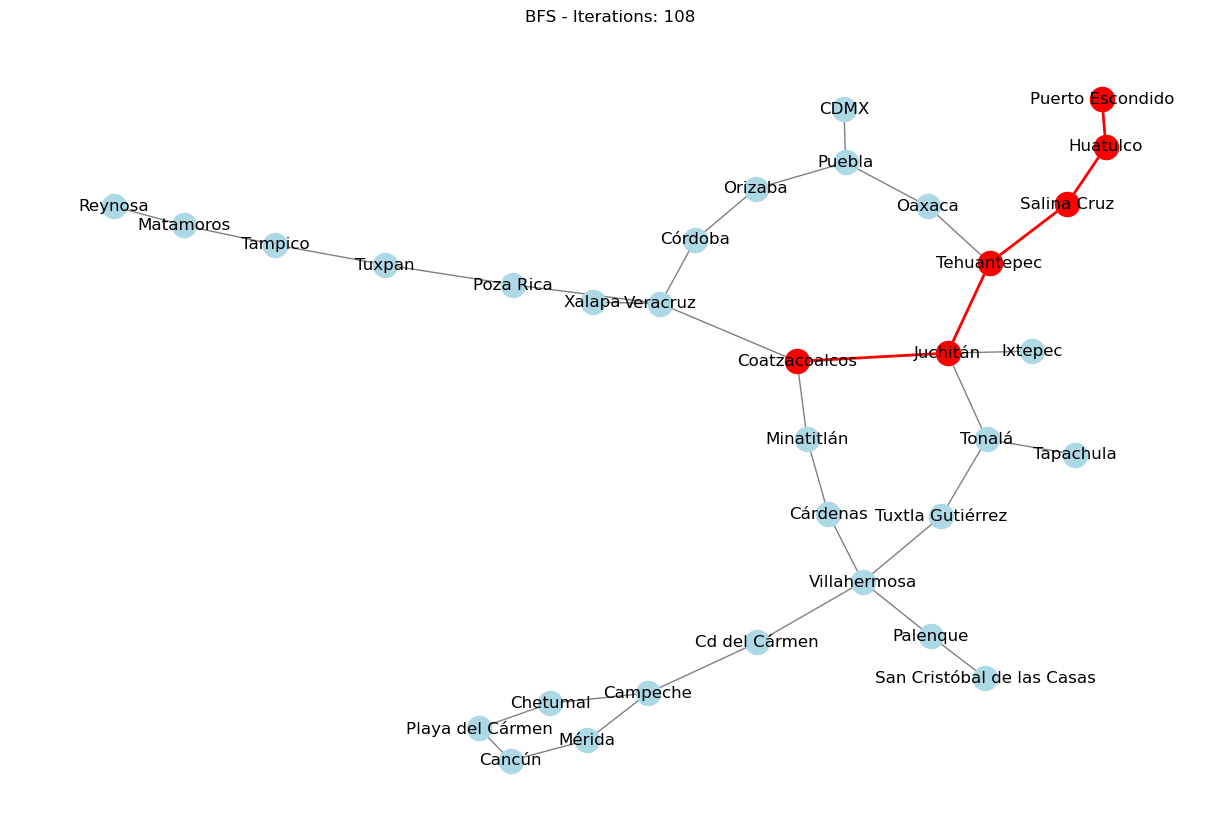

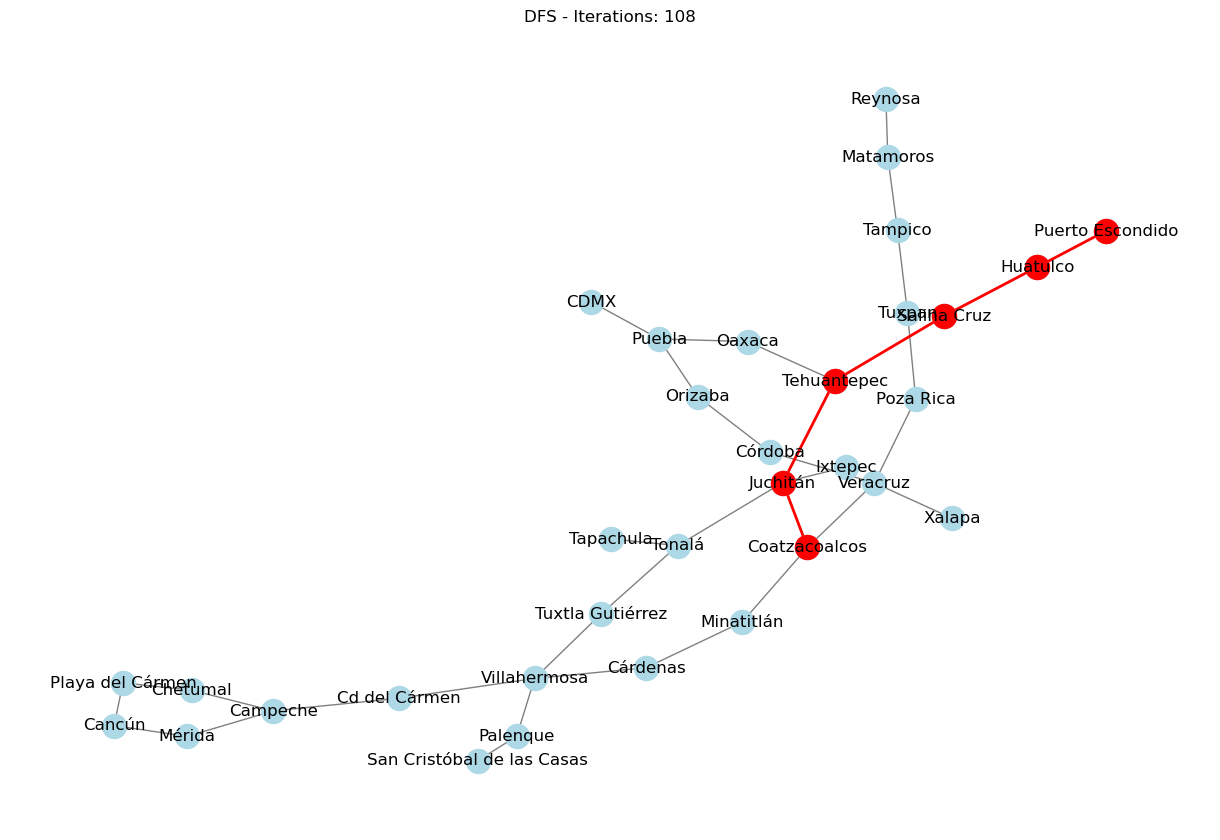

In [111]:
# Dibujar el grafo
plot_graph(grafo, "BFS", bfs_data['iterations'], bfs_data['paths'], bfs_data['shortest_path'])
plot_graph(grafo, "DFS", dfs_data['iterations'], dfs_data['paths'], dfs_data['shortest_path'])

## En este caso, utilizamos tanto BFS como DFS para encontrar todas las rutas posibles y destacamos la ruta más corta encontrada por ambas.
## Ambos algoritmos encuentran todas las rutas posibles, y con las mismas iteraciones, pero el algoritmo BFS encuentra la ruta más corta en menos iteraciones que el algoritmo DFS, por lo que parece funcionar mejor.